In [ ]:
!unzip ulcer.zip

Streaming output truncated to the last 5000 lines.
  inflating: ulcer/train/Abnormal(Ulcer)/296.jpg  
  inflating: ulcer/train/Abnormal(Ulcer)/297.jpg  
  inflating: ulcer/train/Abnormal(Ulcer)/298.jpg  
  inflating: ulcer/train/Abnormal(Ulcer)/299.jpg  
  inflating: ulcer/train/Abnormal(Ulcer)/3.jpg  
  inflating: ulcer/train/Abnormal(Ulcer)/30.jpg  
  inflating: ulcer/train/Abnormal(Ulcer)/300.jpg  
  inflating: ulcer/train/Abnormal(Ulcer)/301.jpg  
  inflating: ulcer/train/Abnormal(Ulcer)/302.jpg  
  inflating: ulcer/train/Abnormal(Ulcer)/303.jpg  
  inflating: ulcer/train/Abnormal(Ulcer)/304.jpg  
  inflating: ulcer/train/Abnormal(Ulcer)/305.jpg  
  inflating: ulcer/train/Abnormal(Ulcer)/306.jpg  
  inflating: ulcer/train/Abnormal(Ulcer)/307.jpg  
  inflating: ulcer/train/Abnormal(Ulcer)/308.jpg  
  inflating: ulcer/train/Abnormal(Ulcer)/309.jpg  
  inflating: ulcer/train/Abnormal(Ulcer)/31.jpg  
  inflating: ulcer/train/Abnormal(Ulcer)/310.jpg  
  inflating: ulcer/train/Abnormal(U

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [ ]:
#img_height, img_width = 32, 32
batch_size = 20

train_ds =  tf.keras.utils.image_dataset_from_directory(
    "ulcer/train",
    #image_size = (img_height, img_width),
    batch_size = batch_size
)

val_ds =  tf.keras.utils.image_dataset_from_directory(
    "ulcer/validation",
    #image_size = (img_height, img_width),
    batch_size = batch_size
)

test_ds =  tf.keras.utils.image_dataset_from_directory(
    "ulcer/test",
    #image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 3055 files belonging to 3 classes.
Found 2154 files belonging to 3 classes.
Found 2306 files belonging to 4 classes.


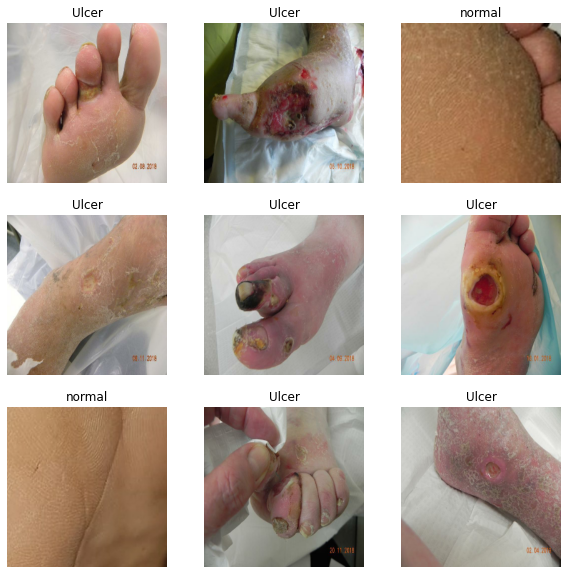

In [ ]:
class_names = ["Abnormal","normal","Ulcer"]
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
model = tf.keras.Sequential(
    [
     #tf.keras.layers.Rescaling(1./255),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation="relu"),
     tf.keras.layers.Dense(3)
    ]
)

In [ ]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)

In [ ]:
model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 10
)

Epoch 1/10
153/153 [==============================] - 305s 2s/step - loss: 0.1740 - accuracy: 0.9509 - val_loss: 4.0802 - val_accuracy: 0.6142
Epoch 2/10
153/153 [==============================] - 282s 2s/step - loss: 0.1394 - accuracy: 0.9558 - val_loss: 2.3311 - val_accuracy: 0.3895
Epoch 3/10
153/153 [==============================] - 276s 2s/step - loss: 0.0999 - accuracy: 0.9663 - val_loss: 5.7081 - val_accuracy: 0.4735
Epoch 4/10
153/153 [==============================] - 276s 2s/step - loss: 0.0530 - accuracy: 0.9863 - val_loss: 6.4897 - val_accuracy: 0.4684
Epoch 5/10
153/153 [==============================] - 278s 2s/step - loss: 0.0336 - accuracy: 0.9908 - val_loss: 5.1950 - val_accuracy: 0.4647
Epoch 6/10
153/153 [==============================] - 277s 2s/step - loss: 0.0220 - accuracy: 0.9941 - val_loss: 10.8754 - val_accuracy: 0.5529
Epoch 7/10
153/153 [==============================] - 276s 2s/step - loss: 0.2498 - accuracy: 0.9417 - val_loss: 2.8657 - val_accuracy: 0.349

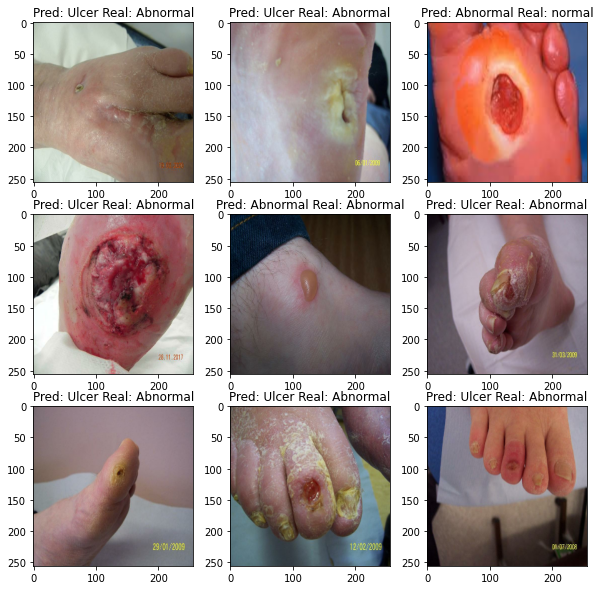

In [ ]:
import numpy

plt.figure(figsize=(10, 10)),
for images, labels in test_ds.take(1):
  classifications = model(images)
  #print(classifications)

  for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " Real: " + class_names[labels[i]])

In [ ]:
model.save("")